In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import datetime as dt
import statsmodels.formula.api as smf

In [ ]:
#Webscraping Singapore's inflation data from rateinflation.com
inflation_df = pd.read_html(requests.get('https://www.rateinflation.com/inflation-rate/singapore-historical-inflation-rate/').text)

#Select inflation data
inflation_df = inflation_df[0]

#Get data from 2017-2022 in reverse order
inflation_df = inflation_df.loc[5::-1]

#Create values for x-axis for months
months = pd.period_range("2017-01", "2022-09" , freq='M').to_timestamp()

#Append inflation data to a list
lst = []
annual = []
for i in inflation_df.to_numpy():
    #Getting only monthly inflation rate from data table
    lst.extend(i[1:-1])
    annual.append(i[-1])


#Removing last 3 months in 2022 because no data yet
lst = lst[:-3]

#Removing % from the inflation data and changing data type to float
lst = [float(i[:-1]) for i in lst]

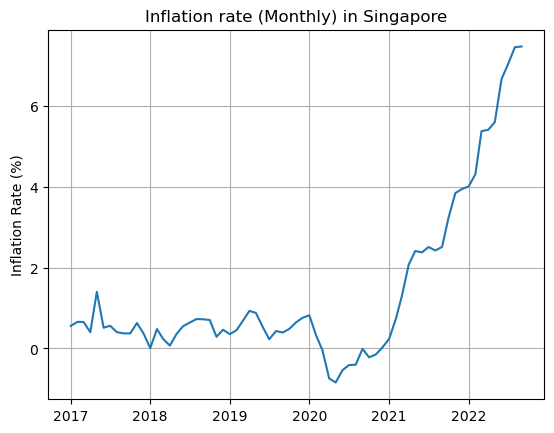

In [ ]:
#Plotting the inflation rate in Singapore
plt.plot(months,lst)
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation rate (Monthly) in Singapore")
plt.grid((0.9,0.9,0.9))

In [ ]:
DATA_DIR = "Data"

RESIDENTIAL_CSV = f"{DATA_DIR}/ExecutiveCondoTransaction.csv"
COMMERCIAL_CSV = F"{DATA_DIR}/OfficeTransaction.csv"
INDUSTRIAL_CSV = F"{DATA_DIR}/WarehouseTransaction.csv"

In [ ]:
residential_df:pd.DataFrame = pd.read_csv(RESIDENTIAL_CSV)
commercial_df:pd.DataFrame = pd.read_csv(COMMERCIAL_CSV)
industrial_df:pd.DataFrame = pd.read_csv(INDUSTRIAL_CSV)

all_dfs = {
    "residential": residential_df,
    "commercial": commercial_df,
    "industrial": industrial_df
}

for df_name in all_dfs:
    df = all_dfs[df_name]
    df = df.dropna()
    df["Sale Date"] = pd.DatetimeIndex(df["Sale Date"]).year

    df["Unit Price ($ PSF)"] = df["Unit Price ($ PSF)"].replace(",", "", regex=True)
    df["Unit Price ($ PSF)"] = pd.to_numeric(df["Unit Price ($ PSF)"], errors = 'coerce')

    df["Transacted Price"] = df["Transacted Price ($)"].replace(",", "", regex=True)
    df['Transacted Price'] = pd.to_numeric(df['Transacted Price'], errors = 'coerce')

    if df_name == "industrial":
        df["Area"] = df["Strata/Land Area (SQFT)"].replace(",", "", regex=True)
        df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
    else:
        df["Area"] = df["Area (SQFT)"].replace(",", "", regex=True)
        df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')
    all_dfs[df_name] = df
    

In [ ]:
residential_df

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,BLOSSOM RESIDENCES,"750,000",753.48,995,1-Oct-19,30 SEGAR ROAD #04-01,Resale,Strata,70,"10,714",...,Executive Condominium,1,99 yrs from 02/03/2011,2014,Private,677721,23,67,West Region,Bukit Panjang
1,PIERMONT GRAND,"1,478,400","1,334.74","1,108",1-Oct-19,26 SUMANG WALK #05-11,New Sale,Strata,124,"11,923",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
2,AUSTVILLE RESIDENCES,"860,000","1,033.34",832,1-Oct-19,19 SENGKANG EAST AVENUE #05-19,Resale,Strata,96,"8,958",...,Executive Condominium,1,99 yrs from 24/08/2010,2014,Private,544808,19,54,North East Region,Sengkang
3,RIVERPARC RESIDENCE,"995,000","1,076.40",924,2-Oct-19,96 PUNGGOL DRIVE #13-15,Resale,Strata,100,"9,950",...,Executive Condominium,1,99 yrs from 27/12/2010,2014,HDB,828797,19,82,North East Region,Punggol
4,PIERMONT GRAND,"1,680,200","1,506.96","1,115",2-Oct-19,26 SUMANG WALK #07-10,New Sale,Strata,140,"12,001",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12112,EASTVALE,"1,050,000","1,097.93",956,30-Sep-22,37 PASIR RIS DRIVE 3 #04-01,Resale,Strata,102,"10,294",...,Executive Condominium,1,99 yrs from 26/06/1996,1999,Private,519494,18,51,East Region,Pasir Ris
12113,PRIVE,"1,360,000","1,097.93","1,239",30-Sep-22,31 PUNGGOL FIELD #09-01,Resale,Strata,102,"13,333",...,Executive Condominium,1,99 yrs from 14/09/2010,2013,HDB,828816,19,82,North East Region,Punggol
12114,THE TERRACE,"1,238,000","1,001.05","1,237",30-Sep-22,98 EDGEDALE PLAINS #09-39,Resale,Strata,93,"13,312",...,Executive Condominium,1,99 yrs from 30/10/2013,2017,Private,828689,19,82,North East Region,Punggol
12115,1 CANBERRA,"1,020,000",947.23,"1,077",30-Sep-22,1 CANBERRA DRIVE #05-04,Resale,Strata,88,"11,591",...,Executive Condominium,1,99 yrs from 30/01/2012,2015,HDB,768101,27,76,North Region,Yishun


In [ ]:
for df_name in all_dfs:
    all_dfs[df_name] = all_dfs[df_name].groupby(["Planning Region","Sale Date"]).mean()

C:\Users\Ronald Toh\AppData\Local\Temp\ipykernel_6468\481731920.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_dfs[df_name] = all_dfs[df_name].groupby(["Planning Region","Sale Date"]).mean()
C:\Users\Ronald Toh\AppData\Local\Temp\ipykernel_6468\481731920.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_dfs[df_name] = all_dfs[df_name].groupby(["Planning Region","Sale Date"]).mean()
C:\Users\Ronald Toh\AppData\Local\Temp\ipykernel_6468\481731920.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False

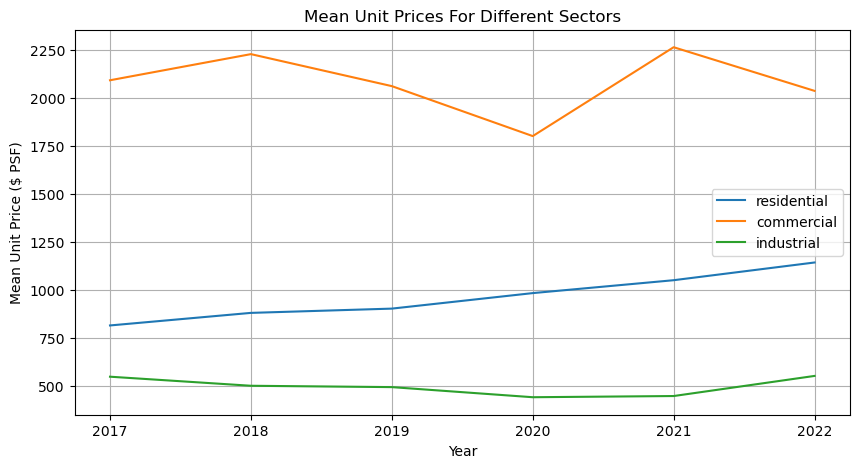

In [ ]:
plt.figure(figsize=(10,5))
for i, df_name in enumerate(all_dfs):
    df = all_dfs[df_name]
    y = df.groupby("Sale Date").mean()["Unit Price ($ PSF)"]
    plt.plot(y, label=df_name)
    plt.legend()


plt.title('Mean Unit Prices For Different Sectors')
plt.xlabel('Year')
plt.ylabel('Mean Unit Price ($ PSF)')
plt.grid()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a tuple

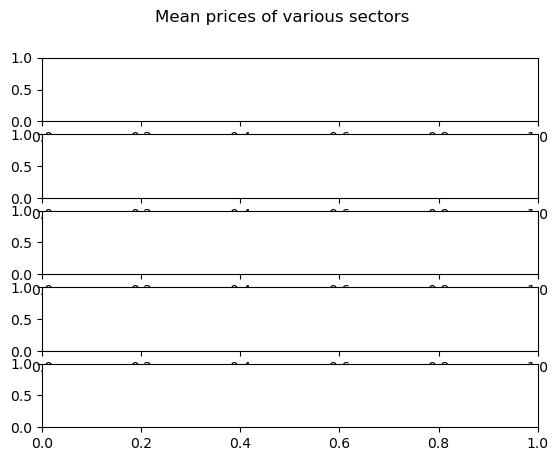

In [ ]:
planning_regions = [
    "Central Region",
    "East Region",
    "North East Region",
    "North Region",
    "West Region"
]
   
fig, axs = plt.subplots(len(planning_regions))
fig.suptitle('Mean prices of various sectors')

def locate(row, planning_region):
    return row.index.values[0] == planning_region

for subplot_index, planning_region in enumerate(planning_regions):
    for i, df_name in enumerate(all_dfs):
        sector_df = all_dfs[df_name]
        # for row in sector_df.rows:
            # if row.index.values[0] != planning_region:
            #     df.row.


        y = df["Unit Price ($ PSF)"]
        axs[subplot_index].plot(y, label=df_name)
        axs[subplot_index].legend()

plt.show()


In [ ]:
df in all_dfs

grouopby [planning region, sale date]

pr
df= df.loc(df[planning region] == pr)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2306335446.py, line 3)

In [ ]:
for df in all_dfs.values():
    print(df)
    break

                             Unit Price ($ PSF)  Area (SQM)  Number of Units  \
Planning Region   Sale Date                                                    
Central Region    2017              1050.750000  113.875000              1.0   
                  2018              1129.238095  122.380952              1.0   
                  2019              1154.357143  129.571429              1.0   
                  2020              1176.333333  123.833333              1.0   
                  2021              1223.000000  126.833333              1.0   
                  2022              1353.750000  127.500000              1.0   
East Region       2017               711.457143  118.142857              1.0   
                  2018               756.129032  117.088710              1.0   
                  2019               832.072993  108.518248              1.0   
                  2020               890.243902  104.668990              1.0   
                  2021              1077

In [ ]:
residential_df.head()

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Property Type,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area
0,BLOSSOM RESIDENCES,"750,000",753.48,995,1-Oct-19,30 SEGAR ROAD #04-01,Resale,Strata,70,"10,714",...,Executive Condominium,1,99 yrs from 02/03/2011,2014,Private,677721,23,67,West Region,Bukit Panjang
1,PIERMONT GRAND,"1,478,400","1,334.74","1,108",1-Oct-19,26 SUMANG WALK #05-11,New Sale,Strata,124,"11,923",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol
2,AUSTVILLE RESIDENCES,"860,000","1,033.34",832,1-Oct-19,19 SENGKANG EAST AVENUE #05-19,Resale,Strata,96,"8,958",...,Executive Condominium,1,99 yrs from 24/08/2010,2014,Private,544808,19,54,North East Region,Sengkang
3,RIVERPARC RESIDENCE,"995,000","1,076.40",924,2-Oct-19,96 PUNGGOL DRIVE #13-15,Resale,Strata,100,"9,950",...,Executive Condominium,1,99 yrs from 27/12/2010,2014,HDB,828797,19,82,North East Region,Punggol
4,PIERMONT GRAND,"1,680,200","1,506.96","1,115",2-Oct-19,26 SUMANG WALK #07-10,New Sale,Strata,140,"12,001",...,Executive Condominium,1,99 yrs from 04/06/2018,Uncompleted,HDB,828618,19,82,North East Region,Punggol


In [ ]:
regression_residential_df = residential_df[["Transacted Price ($)","Area (SQFT)"]]
regression_residential_df = regression_residential_df.rename(columns={"Transacted Price ($)": "Price", "Area (SQFT)":"Area"})
regression_residential_df["Price"] = regression_residential_df["Price"].replace(",", "", regex=True)
regression_residential_df["Area"] = regression_residential_df["Area"].replace(",", "", regex=True)
regression_residential_df['Price'] = pd.to_numeric(regression_residential_df['Price'], errors = 'coerce')
regression_residential_df['Area'] = pd.to_numeric(regression_residential_df['Area'], errors = 'coerce')
reg1 = smf.ols("Price ~ Area ", data = regression_residential_df).fit()
reg1.params


Intercept    407810.951523
Area            620.415408
dtype: float64

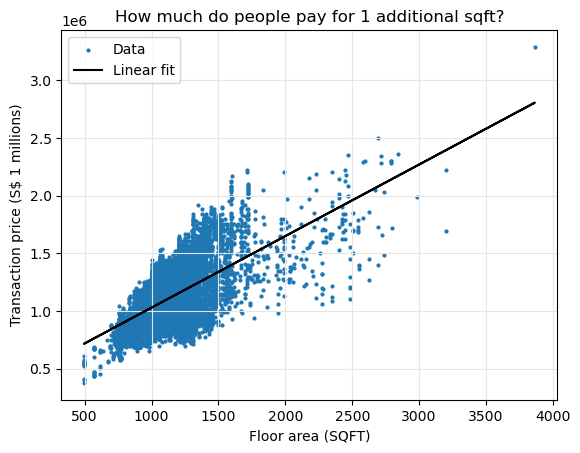

In [ ]:
# Linear relationship (Linear trendline)
regression_residential_df['fit_price'] = reg1.params[0] + reg1.params[1]*regression_residential_df['Area']

fig, ax = plt.subplots(1,1)
plt.scatter(regression_residential_df['Area'], regression_residential_df['Price'],s=4, label = 'Data')
plt.plot(regression_residential_df['Area'],regression_residential_df['fit_price'],color=(0,0,0), label = 'Linear fit')
plt.title('How much do people pay for 1 additional sqft?')
plt.xlabel('Floor area (SQFT)')
plt.ylabel('Transaction price (S$ 1 millions)')
plt.legend()
plt.grid(color=(.9,.9,.9))
plt.show()


# Extra Codes

In [ ]:
#Webscraping Singapore's inflation data from macrotrends.net
inflation_df2 = pd.read_html(requests.get('https://www.macrotrends.net/countries/SGP/singapore/inflation-rate-cpi').text)

#Selecting the correct dataframe
inflation_df2 = inflation_df2[1] 

#Renaming the columns
inflation_df2.columns = ['Year', 'Inflation Rate', 'Annual Change']

#Removing the % in the data of Inflation Rate and Annual Change
inflation_df2 = inflation_df2.replace("%","", regex = True)

#Changing all values in dataframe to numeric data
inflation_df2['Year'] = pd.to_numeric(inflation_df2['Year'], errors = 'coerce')
inflation_df2['Inflation Rate'] = pd.to_numeric(inflation_df2['Inflation Rate'], errors = 'coerce')
inflation_df2['Annual Change'] = pd.to_numeric(inflation_df2['Annual Change'], errors = 'coerce')

#Seeing the dataframe
inflation_df2.head()

,Year,Inflation Rate,Annual Change
0,2021,2.30,2.49
1,2020,-0.18,-0.75
2,2019,0.57,0.13
3,2018,0.44,-0.14
4,2017,0.58,1.11


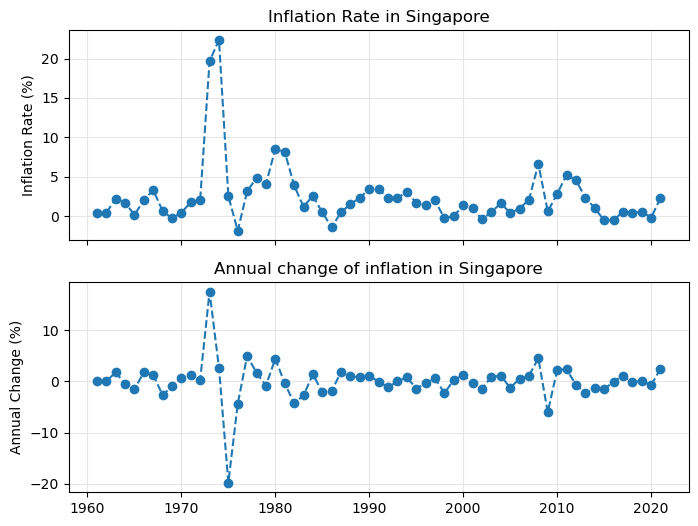

In [ ]:
#Using matplotlib.subplots to plot two figures using webscraped data
#Share the same x axis (Year) for both figures 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)

#Plotting Figure 1: Inflation Rate in Singapore
ax1.plot(inflation_df2['Year'],inflation_df2['Inflation Rate'],linestyle='dashed',marker='o',markersize=6)
ax1.set_title('Inflation Rate in Singapore')
ax1.set_ylabel('Inflation Rate (%)')
ax1.grid(color=(.9,.9,.9))

#Plotting Figure 2: Annual change of inflation in Singapore
ax2.plot(inflation_df2['Year'],inflation_df2['Annual Change'],linestyle='dashed',marker='o',markersize=6)
ax2.set_title('Annual change of inflation in Singapore')
ax2.set_ylabel('Annual Change (%)')
ax2.grid(color=(.9,.9,.9))

#Using tight layout to look more pr

In [ ]:
residential_df = pd.read_csv("Data/ExecutiveCondoTransaction.csv")
residential_df = residential_df.replace(",","", regex = True)
residential_df['Unit Price ($ PSF)'] = pd.to_numeric(residential_df['Unit Price ($ PSF)'], errors = 'raise')
residential_df['Sale Date'] = pd.to_datetime(residential_df['Sale Date'], infer_datetime_format=True)
residential_df['Sale MY'] = residential_df['Sale Date'].dt.strftime('%Y %m')
residential_region_df = residential_df.groupby(['Planning Region', 'Sale MY'])

residential_central_df = residential_df.loc[residential_df['Planning Region'] == 'Central Region']
residential_central_df = residential_central_df.sort_values(by='Sale MY')
residential_central_df = residential_central_df.groupby('Sale MY').mean()


C:\Users\Ronald Toh\AppData\Local\Temp\ipykernel_6104\3947075145.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  residential_central_df = residential_central_df.groupby('Sale MY').mean()


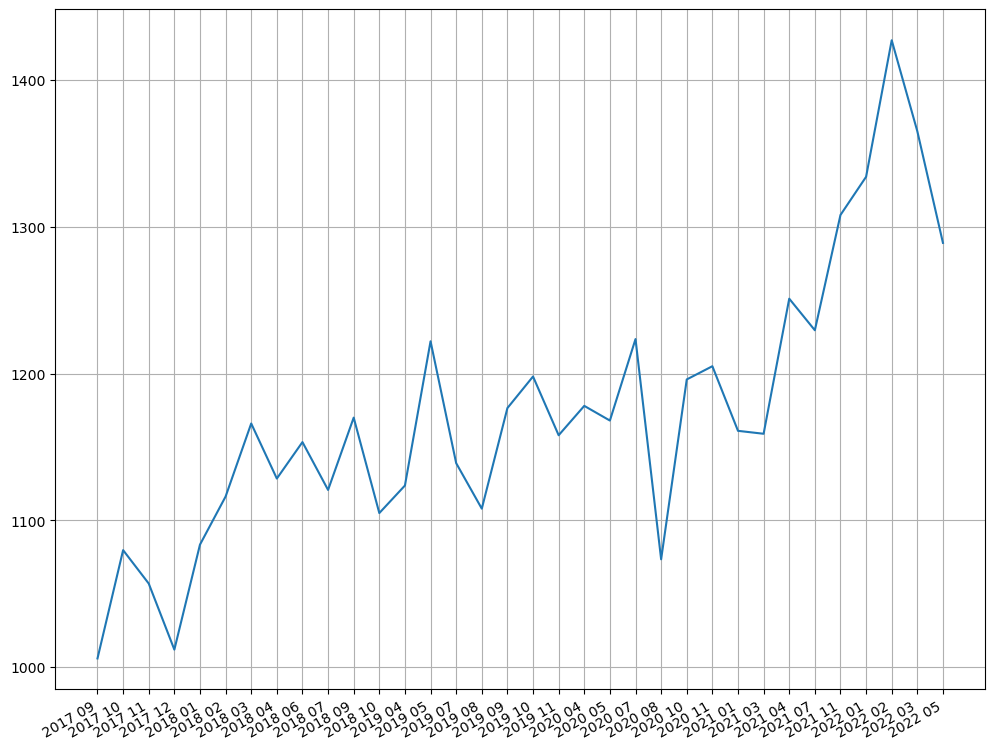

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

# half_year_locator = mdates.MonthLocator(interval=6)
# ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only.
fig.autofmt_xdate()
ax.plot(residential_central_df['Unit Price ($ PSF)'])
plt.grid()